# Desafio: Analisando Texto sobre Ciência de Dados

> *Neste notebook, experimentamos usar diferentes URLs - artigo da Wikipedia sobre Aprendizado de Máquina. Você pode perceber que, ao contrário de Ciência de Dados, este artigo contém muitos termos, tornando a análise mais problemática. Precisamos encontrar outra maneira de limpar os dados após a extração de palavras-chave, para eliminar algumas combinações de palavras frequentes, mas sem significado.*

Neste exemplo, vamos fazer um exercício simples que cobre todas as etapas de um processo tradicional de ciência de dados. Você não precisa escrever nenhum código, basta clicar nas células abaixo para executá-las e observar o resultado. Como desafio, você é incentivado a testar este código com dados diferentes.

## Objetivo

Nesta lição, discutimos diferentes conceitos relacionados à Ciência de Dados. Vamos tentar descobrir mais conceitos relacionados fazendo um pouco de **mineração de texto**. Começaremos com um texto sobre Ciência de Dados, extrairemos palavras-chave dele e, em seguida, tentaremos visualizar o resultado.

Como texto, usarei a página sobre Ciência de Dados da Wikipedia:


In [2]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

## Etapa 1: Obtendo os Dados

O primeiro passo em todo processo de ciência de dados é obter os dados. Usaremos a biblioteca `requests` para isso:


In [3]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"77162785-16e9-4d7f-a175-7f3fcf502a66","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":1041247229,"wgRevisionId":1041247229,"wgArticleId":233488,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Harv and Sfn no-target errors","CS1 maint: uses authors parameter","Articles with short description","Short description is dif

## Etapa 2: Transformando os Dados

O próximo passo é converter os dados para um formato adequado para processamento. No nosso caso, baixamos o código-fonte HTML da página e precisamos convertê-lo em texto simples.

Existem várias maneiras de fazer isso. Vamos usar o objeto [HTMLParser](https://docs.python.org/3/library/html.parser.html) embutido mais simples do Python. Precisamos criar uma subclasse da classe `HTMLParser` e definir o código que coletará todo o texto dentro das tags HTML, exceto as tags `<script>` e `<style>`.


In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Machine learning From Wikipedia, the free encyclopedia Jump to navigation Jump to search Study of algorithms that improve automatically through experience For the journal, see  Machine Learning (journal) . "Statistical learning" redirects here. For statistical learning in linguistics, see  statistical learning in language acquisition . Part of a series on Artificial intelligence Major goals Artificial general intelligence Planning Computer vision General game playing Knowledge reasoning Machine learning Natural language processing Robotics Approaches Symbolic Deep learning Bayesian networks Evolutionary algorithms Philosophy Ethics Existential risk Turing test Chinese room Control problem Friendly AI History Timeline Progress AI winter Technology Applications Projects Programming languages Glossary Glossary v t e Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection Data Cleaning AutoML Associ

## Etapa 3: Obtendo Insights

A etapa mais importante é transformar nossos dados em algo do qual possamos extrair insights. No nosso caso, queremos extrair palavras-chave do texto e identificar quais palavras-chave são mais relevantes.

Usaremos uma biblioteca Python chamada [RAKE](https://github.com/aneesha/RAKE) para a extração de palavras-chave. Primeiro, vamos instalar essa biblioteca caso ela não esteja presente:


In [5]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


A funcionalidade principal está disponível no objeto `Rake`, que podemos personalizar usando alguns parâmetros. No nosso caso, definiremos o comprimento mínimo de uma palavra-chave para 5 caracteres, a frequência mínima de uma palavra-chave no documento para 3 e o número máximo de palavras em uma palavra-chave para 2. Sinta-se à vontade para experimentar outros valores e observar o resultado.


In [6]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('polynomial time', 4.0),
 ('dimensionality reduction', 4.0),
 ('anomaly detection', 4.0),
 ('data set', 4.0),
 ('bayesian networks', 4.0),
 ('language corpora', 4.0),
 ('mcgraw hill', 4.0),
 ('mit press', 4.0),
 ('retrieved 2018-08-20', 4.0),
 ('artificial neuron', 3.9642857142857144),
 ('statistical learning', 3.9470198675496686),
 ('feature learning', 3.9470198675496686),
 ('reinforcement learning', 3.9470198675496686),
 ('deep learning', 3.9470198675496686),
 ('main article', 3.9411764705882355),
 ('machine learning', 3.9144111718974948),
 ('pattern recognition', 3.9),
 ('neural networks', 3.875),
 ('artificial intelligence', 3.864285714285714),
 ('supervised learning', 3.835908756438558),
 ('speech recognition', 3.833333333333333),
 ('bayesian network', 3.833333333333333),
 ('explicitly programmed', 3.8),
 ('biological brain', 3.8),
 ('unsupervised learning', 3.780353200883002),
 ('outlier detection', 3.75),
 ('ieee transactions', 3.75),
 ('isbn 978-0-262-0

Obtivemos uma lista de termos juntamente com o grau de importância associado. Como você pode ver, as disciplinas mais relevantes, como aprendizado de máquina e big data, estão presentes nas primeiras posições da lista.

## Etapa 4: Visualizando o Resultado

As pessoas conseguem interpretar os dados melhor em forma visual. Por isso, muitas vezes faz sentido visualizar os dados para extrair alguns insights. Podemos usar a biblioteca `matplotlib` em Python para plotar uma distribuição simples das palavras-chave com suas respectivas relevâncias:


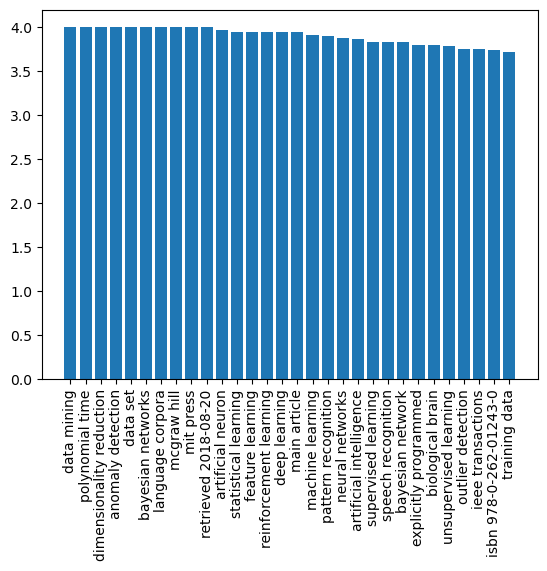

In [9]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])

Há, no entanto, uma maneira ainda melhor de visualizar frequências de palavras - usando **Word Cloud**. Precisaremos instalar outra biblioteca para plotar a nuvem de palavras a partir da nossa lista de palavras-chave.


In [71]:
!{sys.executable} -m pip install wordcloud

O objeto `WordCloud` é responsável por receber o texto original ou uma lista pré-computada de palavras com suas frequências, e retorna uma imagem, que pode então ser exibida usando `matplotlib`:


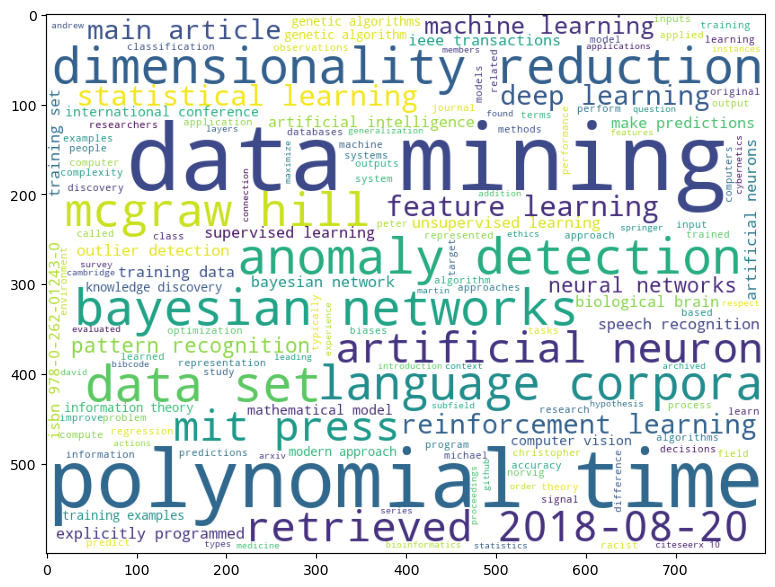

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

Podemos também passar o texto original para `WordCloud` - vamos ver se conseguimos obter um resultado semelhante:


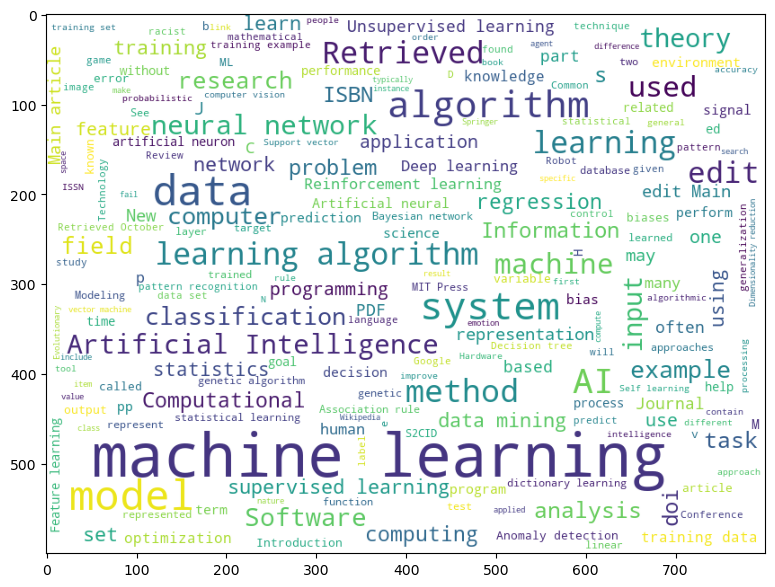

In [13]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Você pode ver que a nuvem de palavras agora está mais impressionante, mas também contém muito ruído (por exemplo, palavras não relacionadas como `Retrieved on`). Além disso, obtemos menos palavras-chave que consistem em duas palavras, como *cientista de dados* ou *ciência da computação*. Isso ocorre porque o algoritmo RAKE faz um trabalho muito melhor ao selecionar boas palavras-chave a partir do texto. Este exemplo ilustra a importância do pré-processamento e limpeza de dados, pois uma imagem clara no final nos permitirá tomar decisões melhores.

Neste exercício, passamos por um processo simples de extração de algum significado do texto da Wikipedia, na forma de palavras-chave e nuvem de palavras. Este exemplo é bastante simples, mas demonstra bem todos os passos típicos que um cientista de dados seguirá ao trabalhar com dados, começando pela aquisição de dados até a visualização.

Em nosso curso, discutiremos todos esses passos em detalhes.



---

**Aviso Legal**:  
Este documento foi traduzido utilizando o serviço de tradução por IA [Co-op Translator](https://github.com/Azure/co-op-translator). Embora nos esforcemos para garantir a precisão, esteja ciente de que traduções automatizadas podem conter erros ou imprecisões. O documento original em seu idioma nativo deve ser considerado a fonte autoritativa. Para informações críticas, recomenda-se a tradução profissional realizada por humanos. Não nos responsabilizamos por quaisquer mal-entendidos ou interpretações equivocadas decorrentes do uso desta tradução.
